#**Prediction using Supervised ML**




##**Linear Regression with Python Scikit Learn**

In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

##**Problem statement**

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

##**To predict:**

What will be predicted score if a student studies for 9.25 hrs/ day?


###**Author: Tina Bihani**


###**Importing all Required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##**Reading data from csv file and visualization**


In [2]:
url = "http://bit.ly/w-data"
student_scores_data=pd.read_csv(url)
print("Student Data Imported Succesfully!")

Student Data Imported Succesfully!


In [3]:
#Prints the dataset stored in 'student_scores_data' variable.
student_scores_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## **Preparing the data**


In [4]:
#The method shape returns the Row and Column of the given dataset.
student_scores_data.shape


#The given dataset has two columns and twenty-five rows.


#Now,we will be using the method info() which will give the information about the DataFrame.
student_scores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


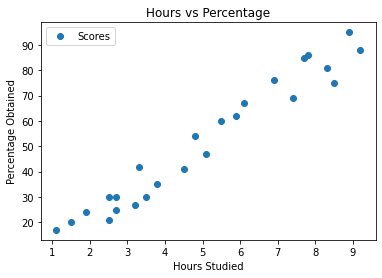

In [5]:
student_scores_data.describe()

#Plotting the distribution of scores
student_scores_data.plot(x='Hours', y='Scores',style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Obtained')  
plt.show()

In [6]:
#variable 'x' contains the list of number of hours studied and variable 'y' contains the list of scores obtained. 
x = student_scores_data.iloc[:, :-1].values  
y = student_scores_data.iloc[:, 1].values

#Displays list of number of hours studied
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [7]:
#Displays list of scores obtained.
y


array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

## **Training the Algorithm**

We have split our data into training and testing sets, and now is finally the time to train our algorithm.



In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

#x's training data
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [9]:
#x's test data
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [10]:
#y's training data
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41])

In [11]:
#y's test data
y_test

array([20, 27, 69, 30, 62])

In [12]:
from sklearn.linear_model import LinearRegression  

regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [13]:
#The attribute 'coef_' computes the coefficients of the features in the decision function
regressor.coef_

array([9.91065648])

In [14]:
#The attribute 'intercept_' is to represents the constant(bias), added to the decision function.
regressor.intercept_

2.018160041434662

In [15]:
#Checking the percentage of correct predictions for the test data.
print("Accuracy : ",regressor.score(x_test, y_test)*100)


Accuracy :  94.54906892105353


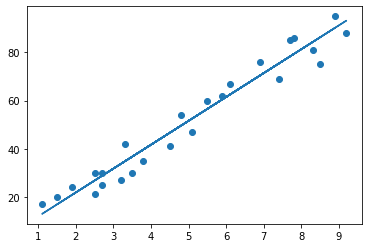

In [16]:
#Plotting Regression Line

line = regressor.coef_*x+regressor.intercept_

plt.scatter(x, y)
plt.plot(x, line);
plt.show()

## **Making Predictions**

Now that we have trained our algorithm, it's time to make some predictions



In [17]:
#The predict() method will predict the label of a new set of data(given a trained model).
y_prediction = regressor.predict(x_test)
y_prediction

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [18]:
#Let's compare actual and predicted data.
avp = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})  
avp

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


## **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is to compare how well different algorithms perform on a particular dataset.



In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae=mean_absolute_error(y_prediction,y_test)
mse=mean_squared_error(y_prediction,y_test)
r_score=r2_score(y_prediction,y_test)
rmse=np.sqrt(mse)
print('Mean Absoulte Error:',mae)
print('Mean Squared Error:',mse)
print('Root Mean Squared Error:',rmse)
print('R-Squared:',r_score)

Mean Absoulte Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-Squared: 0.9546785947197246


## **Solution**

In [20]:
hours = 9.25
predicted = regressor.coef_*hours+regressor.intercept_
print("No of Hours = ",hours)
print("Predicted Score = ",predicted[0])
y_predict=regressor.predict([[hours]])
print("Predicted Score if a student studied for 9.25 hours per day:",y_predict[0])

No of Hours =  9.25
Predicted Score =  93.69173248737539
Predicted Score if a student studied for 9.25 hours per day: 93.69173248737539
